# Exercise 4
In this exercise, we will control a 2D drone depicted in the figure below <br>
<img src='quadrotor.png' width="300">

Consider the following simplified linear model of the drone
$$\begin{align}
    x_{n+1} = A
    x_n + B u_n
\end{align}$$

where the components of the state $x_n$ correspond to the horizontal position and velocity of the quadrotor, its vertical position and velocity and its orientation and angular velocity. The control vector
$u_n$ contains the forces produced by the rotors (our control inputs).
The module ```quadrotor.py``` defines the matrices $A$ and $B$ and code to generate a simulation of the drone.

In [1]:
# what we need to do computation and display the drone
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [2]:
# the matrices A and B are already defined in the quadrotor module
print(f'A =\n {quadrotor.A}')
print(f'B =\n {quadrotor.B}')

A =
 [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B =
 [[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.02   0.02 ]
 [ 0.     0.   ]
 [ 0.015 -0.015]]


In [3]:
# we can display the behavior of the drone based on a given control input

# we can also start at x0 = 0 and generate a random control of 0 for 300 time steps
x0 = np.zeros((6, 1))
u = np.random.rand(2, 300)

quadrotor.animate_robot(x0, u, goal=[3, 3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAIJNtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ETRliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCNT/0/dhJIzAJyZMhQHovEGSv/F3w0ijovPgSEF+f8XyAhQngyn0F6IKd/RkqYKmtWPIQQkVHrq
C7e94783CsYraD/MDtWVf9fL4FPGCyUIb/yIw70driWO22rSgsQN+97GElKO+ZSLYfvTeMkY9E33
7krU8FB+eRw0/MLPNBvKuolub1HTfuTez63BbnI6+oG6CfTlrmXe+EpEyrMhihCWZLQQLOn+y3lG
GnlN+dxkrvqSVT0E3MqZub8nEHVENNE/ib7AFnJ8bCFFu646akmpbJKTKfHxS9Nu4BJI0kjRq6Sd
9d/OAWMzxqtoFoiiOfHE5s2qlTV2WzkrDUBmImAN+qWXrePOdxj2DMfe4naB/U3Grnr+0USAYDq/
+7rNq6RF+6lgFsXXiFuAAABrgRUKWpWTBB1YU2Ob9oySKCYlUgaWLIWPYxbC/oXZ5D0Mcn0AnYdB
x5S1YyRgTJz4oXUbUQvoW94fZ0Eat5Q0CjZfsUBOXxJqOooB/uQwNDcuMlXhcqz4jn1Ri7yTLagp
UPZ35gCJbZtWLMgXmMwbstRfe3zKfBbhK1oasKRIKgsdrqa2+oUrg69960RI1Od7oJnbBui5hyRc
i0EtFbxMTm7o5ajrqt8bL6E71ASqWQb3EvSofUN4rOBZLBfaoYT6PoJpSmlBmTHkNBsHSvlirhwj
UA+aI3lqGfxJfh0Oh1qRewu+n9cWIAb/cd0wLjMbHqcqPhSgjAdwzu1t29OESyW4DS2O2UfvIQZx
wMrM6uxooCWW/A+cqzBeaHsOue8F2oypvWX1ONqAWMc4wZ3GArnpPBpar7a30o3J7iqoW5Np5TOQ
rr8eu+rkJDU3ERcqWfhXQbmJqJu3zCMgzKd/82yQjce7g1dIUrkS/vvXxynmjcoVrKH3jSYajF3J
jGRjbcZfFaGaBtDMBpHumKtuWnIGbWR1BAOM5PdA2tPRF83kmG/EYUXE1jbLK2ERRSkXRjdzo/3D
Kw41fCvnDp9z11ON7+BkcD98XvSR1yN+lMJP3rMN+twvpjNQMChhMe87v4PUbfU4V8YGs710kjS2
yXGu7tlaDUBa+Vc4fDMeyJG8Rv6JEAAAaaA56okth5TmWGVuwANFVVQU4DQIt8MOvqMkyWYQngxe
aL9EY0/s0ElHHBIfGBzHiRXI2hvBXfRv8uPNz+TDAP5fgWaLtrsIo0/a2jD+jFZOI1Q60uqnkOav
t7Bhv4Epg1lGIxl42opeow4leyIgHy0rThbUz9JvbRNB27cujOTbZ0BriO3zcThLWEg1FFGrzO7Z
0JzD/s+HDwWWBnA885ynLsu0+wBBU5x/C/OYGjemg2vCBTxaxeZQR0+TEbISdStTV9+0rwgt6cGD
rKh3aameaMOQ086/znNdTTogs3EkpaILzc5LuVwCwuoFq6wAL3QIk5Kc/WRyMExr5nu1H95ndVHO
awUklshokx9uJHbvuUr3rh2z860PLmNmEwVdJRRzgnHH91G2QRAv2NpsY/U/GAv7SvdLAq4h9TB1
3j9VVsHP1MuPQI0cAc7lYo0MsIBXlW+cYEx205owK1diN13oEAauWWIDdC6rXpVbeJ6KMuWJMG/6
EsKmY46xeSFeaNfbr4k0utTS5CkKYedDMvW0+tTuLQ4aGRpAX90Uv+iWcUBJXfV/13rIsWzH5apn
705hWhAmDhUtaPHjFX+ppPH/heDv97gF4ZoBE3shwY4hkPp1fhT3f5cdKN6FUxc4U00qY2ChJX4/
+er40fQEPaXMjRdoCkswnc9CS83uO4t2fkggHWZxq6dCJWBa1NXnUVR4jQiWnJuAL6ts3o+bFJ3y
ZHwd6iV38ciO9GH2hV4LDtw88sxGj45HpbD9e4LdB3R7uyl4UdmFyWSEh3IVVUDfUcR//qeq49e3
oRbF2F1x2bmzXbHzEbBaqcCUOl3VZFGf+eQ77novq3Jka675x7NMSgAAU9iqYRlQgeTTSjGjArcI
7dj0HdkugEyZKAAAN7n7s9pWc5o3tWPTnFgBzNHs24wi+MPzMs0VyW7jJB3WQ8e/RSqzf47jBAY+
J7XnJTWkEDC3x/lxIb5zVOIJS+n1aQrucCjFHUsEoFSYEK88Ej1CYKvF3nPpES6f710RyBO36L7R
tlMuq9cC8Jxj/UXtdICFNKANe2//XGaSy7lNgxR2JcYNexN3qv6+TwRwAvoJL8Ap14bdAKtgpc78
9LEk5OgmSnNOqVzkW2RNsc89OAFVENzdZa2A32Qq3mUyhLC9DvWZVyTfaCI5uwPLM2gYQLgAc77g
0P8t0NWJsTr6WiP1aEeCCq5e2Sfpus4ZfJFFSA4pTJTpNkKqRYv3dju75aX+GsvtqQZ50/J5seTM
pZL7aSxNqPBixB66Lz7D0b/fg8unXA57TAi66ehJ9g3SoEe8jvXsK7Zb2JmcSL+VdbX9XCCxYD+n
EBs7WGgQoq+I5D7/iL6RZcGBGM6SzpXDb6LXeoFvnvoS1fxmGb3w/kyzqEpeSmjsKW8pIv2f3Nnf
qjoprHGuw4hG8xeVJHB3gUgXsek/6i6ngvrp07clvcH+/2KBMtZskZdt5cu2pbl5hihpgSuUS5fB
r6qCh7aSHmLzkzQDYiILiXW8X4aNW2PswlpQ+SPd9+e6BHeiiA2JDl+ZS4oyeWr50IJ6K6sT8Mon
vJosOUW88ijynqk9rrgueGx/zXTDKeINJcWR0hVk65k+gtFuskTJpcL406VrRXzB3f5twgkKGGJ2
vEH22vvQlL/kx8YdmzBE001RqYyLWIPCNHTg7ZLkf/8YmvIPTxvw9u3FraS3K2LZd71CO9h5n6qJ
g/wxJDhvoFb6+NHAoQV0w

We want to generate a control input will move the drone towards the point $(3,3)$ starting from $(0,0)$. In order to
do so, we define a cost that penalizes the distance to the goal at each time step while minimizing velocities and the amount of trust needed,
i.e. we want to solve the following optimal control problem
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$
where $x_{desired} = [3,0,3,0,0,0]^T$$

1. Write down the KKT conditions for the problem
2. Write code to solve the problem for N=500 time steps (you will need to find diagonal matrices $Q>0$ and $R>0$ to create a nice movement) by solving the KKT system of linear equations. Do NOT inverse the KKT matrix, instead use the [NumPy solve function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which is numerically more stable and efficient.
4. Show plots of all the states of the robot as a function of time
5. Show plots of the optimal control as a function of time

## Solution

### The KKT Conditions for the given problem can be formulated as shown below:

$$
\begin{align}
L(y, \lambda) = \frac{1}{2} y^T G y + \lambda^T (My - p)
\end{align}
$$

Where, 
$
G = \begin{bmatrix}
Q & 0 & 0 & 0 & \cdots \\
0 & R & 0 & 0 & \cdots \\
0 & 0 & Q & 0 & \cdots \\
0 & 0 & 0 & R & \cdots \\
0 & 0 & 0 & 0 & \ddots \\
\end{bmatrix}
$, 
$y = \begin{bmatrix}x_0 - x_{desired} \\u_0 \\x_1 - x_{desired} \\u_1 \ \\vdots\end{bmatrix}$, 
$M = \begin{bmatrix}
I & 0 & 0 & 0 & 0 & 0 & \cdots \\
A & B & -I & 0 & 0 & 0 & \cdots \\ 
0 & 0 & A & B & -I & 0 & \cdots \\ 
0 & 0 & 0 & 0 & A & B & \cdots \\
0 & 0 & 0 & 0 & 0 & 0 & \ddots \\
\end{bmatrix} $, 
$p = \begin{bmatrix}x_0 \\ 0 \\ 0 \\ 0 \ \\vdots\end{bmatrix}$



Final State = [ 3.00031e+00  4.43000e-03  3.00000e+00 -0.00000e+00  2.60000e-04
  5.01000e-03]
U1 : Max = 3.21597, Min = -2.52167
U2 : Max = 26.1901, Min = -6.32256


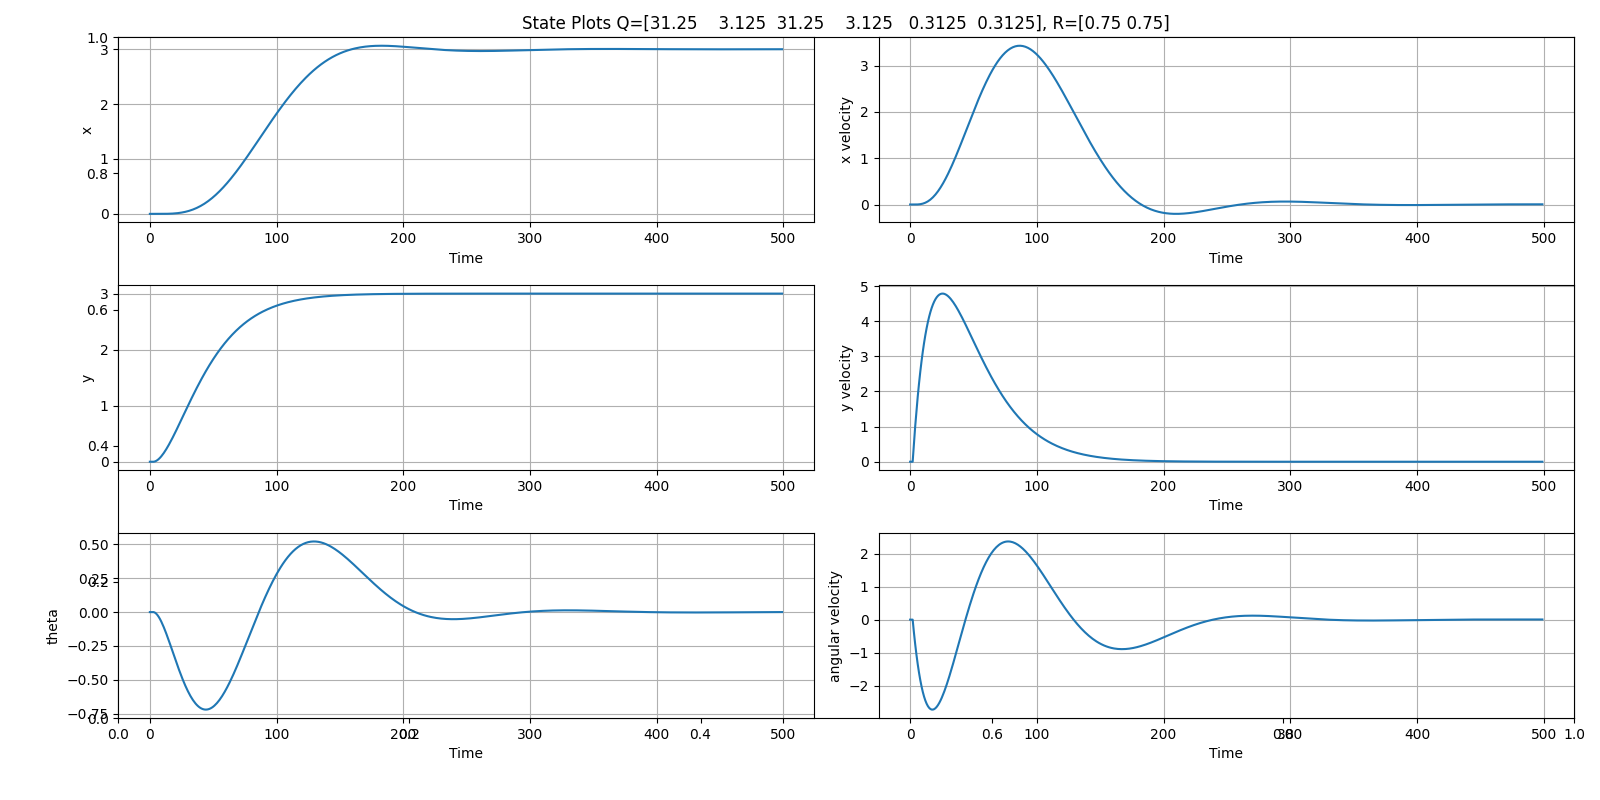

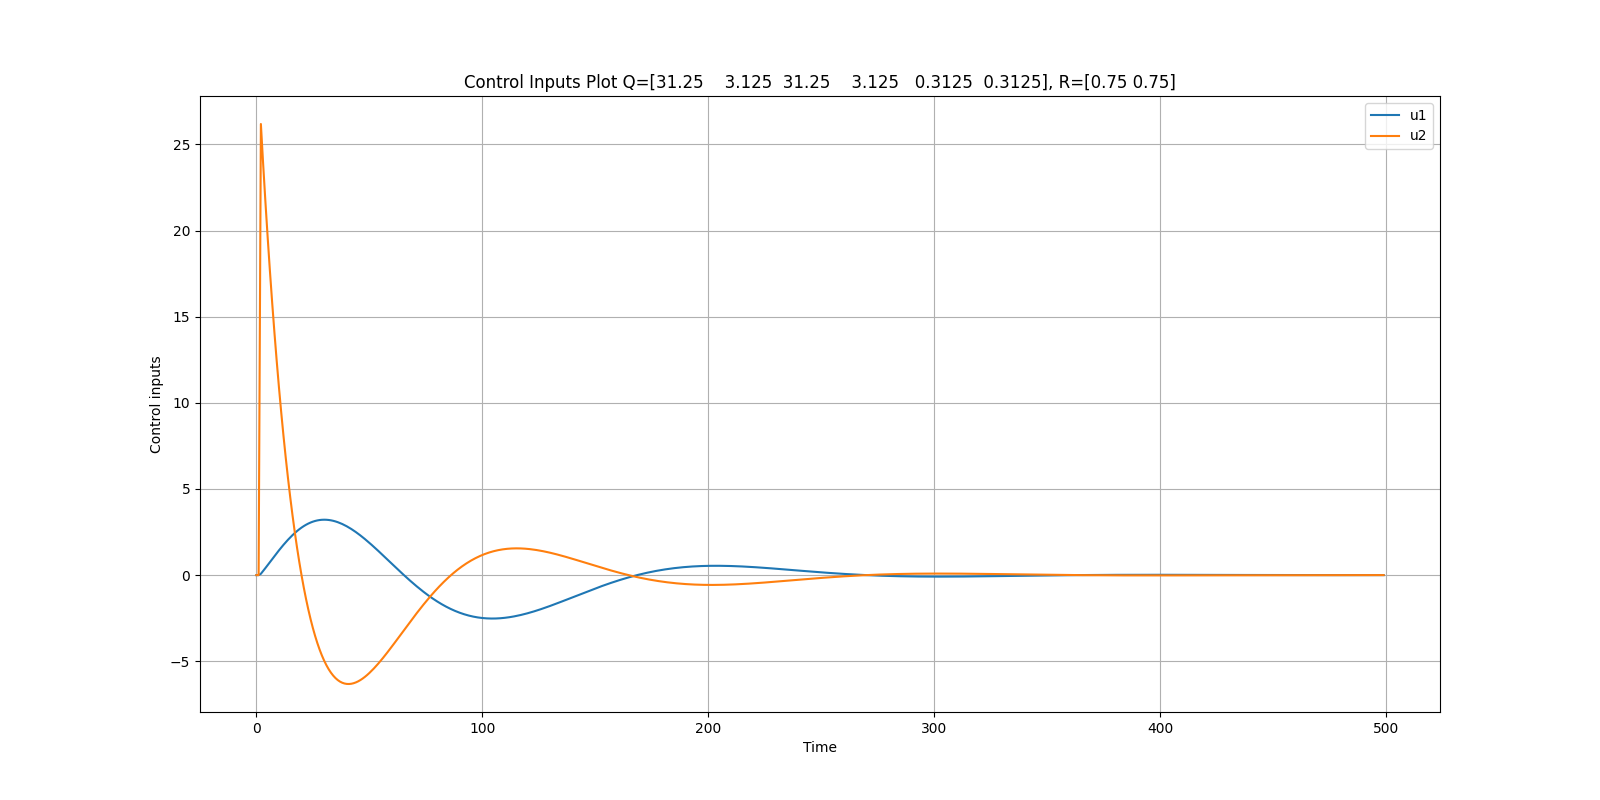

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAL5ltZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ENBliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAAVt6RlhkJ0L/JiAAAFfACy
BoAJ0/deNlxATljGKOZAuIjme27NfsYhAbFOlewDRF4IfKNDMH4Fv/q9RH8BCnmQCtkOmDFO5FsH
C/gh+ENzqQrfd3lpmJFLa+MNDKZs3fAjY20pX6A+EXDineinS/1R3baEFsSXbbf6hIVmeXqGcaP8
VTwxCrdyHWvaBrDj1N+wdZ3pbWsr21bD30HrNIAH3L9fLqY22RMX0uNu261iN63x3534+dC3oilR
IMhd1P2Q6MqAEXXQxeR3yCjnJEN+hp+qeLUJsvuK43U8CXKIfy/TrX2TfrQbEbHQzcoirKEIlUTN
dH3si1OP3VjXa345J8c/x/JrUJ1COOAkTYQh/g0Md8oYnS+vnPhlhAagjUfdVaxUYXy4l2q/R/5l
afLwxI/GwZkNjFvV5RRFMf8TYOmXXDerAQT0iOnQ/jkCYwBLPh+WpK5XwGi6L7OXu6DxniZwe4cs
w745kn8a3SEAvvQjthb/yaSMdKtge/4QBnvsuJN5TTd/nURV29GrltGtN+LNwhTo6sb/N0K/l8Dz
uZkU0pkE1CEIH3GM5SN5rX1LjfYhbvdWoYKWEV9rIxAxjCkMlS2LvhWRTljTIHKKMrbXc5/JfdQd
tGKRdLsV7Bqbnv+VexQV0MTo2gi93kX+EcjuA5e6cAwug4NJDbm0dpdDhIc7RcxYMvsed74f0M3Q
Vp18O2ufvDi/VWJ4kUDN0YvFqczMUP7FLCpVSfeP4Yl7qkvoWwNKcCEH7JXDk/bF2oiGf4s4TL3p
/wlyNeEYeBPBsCKi0Nt16rpkkg5L0JDgCvtzIQ/tAXKDG3qBtiQPNDn6jvOkeR+BeyhZCSF7Ua27
9OrDW534GxhuErZ+umI+GWli8g56H4Z1e/3mI3y/84SCC7HRMtp59ztJOEVAT2xOgyfXxOYdTyeg
8HMsJXws1ox+lKi17v6BYrwjitLIpHdKBo4zKl6in9JkAzhcUsMLd4XWaTxOwH5IHQK5sThlBcUU
mZOEBhkWsDsv1NmVEbvD8yi19XmG8CEJj9YzcZKx6qixE2fpT+/MpdmebfmDoqgAANVp/bdXqFQZ
L46UrKO3lDhbwrpn0xP3J+9vtrDZFg7Rn/I0Mn4WdiH95oi+oL/Np3DiY7BReVmsyCRgXYLHWpo+
8TY0OAkykzmA3jwnYZ2LwcR+HqYIBhHV/4CaQpRJVL5QtdmeNtw3iJH0wIJElMka9j0rM3gpT7Py
yNwPKzRg1P6Qr7Diqe7dLdGlOqbpRby6VJjWhZR3SzcVqGtXDiOyQPBsNC2Y1HRzXhIUCpLDunLA
Ye8OtS2TNjdsZixbjYzFbRlfliPC9rE9fD+ALO4vnCl4+KKJY3T8sy17SxWIXMfZWgWxyxwiv+tE
zxosxKN3X5CuomiO3guz+vYtgsuNYZwhF59ZjNxXH+jGBoxP9yOn29dWT/o31s+S08zu76MXtrqt
SgsrNCHE9y8tHFaKXNyTakoBcSXwHXyXvaLnjG/DtPs0B8u4liELXbFcm6vkomGkYAAAAwAsn8ib
9XbkAAAldwXjWlubrCB6KBjj0znIl/GLkq57wY2Y7JXnwk7sIToY7IBEll7OWU8q5XtlsRhTZMtL
XKE6yr3A7QYuITycD1UA1HntFz7C2Ofi5wUuyNiy2TTy+77oSfU/DqdiLKp4nr8y6qVqm6ztP7Vk
RdNhNt/SvYhSFV8lyJpbVlt8Au7gRX9SpgwvzAqRuN3X6X2OGwx3djuENFu0POlcuLvDYVhH1ZpZ
SEIt+nbJ2HzGIDK04c0GCtPVAG/4+znYV+dtqZ3+0drkk6Iv/9brDNw0NZ5QbPJiAE09rj03/tjG
vfBtobYaAAEJpf5hnfTygzVSHysjtpODrRMPgD8pt88lqAAAYYxMnMBvs5Ln/h++KJQryZn2NQdq
SdLkZtYwMeMONU8j90HI+DUN5cZIK6tOQbArcX/3DJxVHVTlR58EI1ajj1UeC8xm2Gx68oMTG+aT
AVPSH54Dz7dP50M3yGg5z7BvgpJy/oc3pzol/SLyQLuEC+nqhkMi4Ev67L1dZJxvOJ4GAbsnGLAx
WQ++COfmieoQr0ofdwnXqgR3tBi8yH6rJIzfxGnVJu4eVpho1Z5aM4m4aNzoFrPe6TCwfbLlhE67
D5ZT9k/23m2TlYUEeIvf/7YF8XC6rUTPxIgl5BBh8prXSigtys0A73acPTGWPmpDO/ZnMVatXq1b
D4ToZhbNkhFiK7lb3s85ob/RAcMV5BQQhv9JQfrx3y3Be832J6HL/afTIjesnOztNWeihLGlElgb
FTiRp1jYOIUnUxjQ4FxjSgNUcG2RhN4mJ2fZfcOll7urmBvyFpIiHcGKrnShdAsSfIGp40fu03rA
9/1QgDgEbAO0AYybr2YcHgXnjp+YrIJlrjf7bnVw4VGnhxmBx483BQHD2reB8YkrRTTJRs5Z85Co
YExp4fNvWLVG7tSizjtEx7fFjXG7LwZPfxgDGYdld9V21dFzW96fSPV9t9lcj6CUpv69eQvVJKwG
N0CJZJvgc3pvRbTyZ2aD6kp9VLFUrGNsqRKvg/fmKyBiifgV7czNn54opylGOfgHdn2PboZFPMCr
77kwU2LLipu28/1x2VDjRgaft/L4qGzRZFJ1kcpM5cdUFHOafpdbmGfkR+JeW/ImG0Tkj2t0M7yb
4uu2gSgBcwAlF5Wv6VBL8tGE/KRxAMAAAH4sle8swvAnYtNirV/8BV6MJZf/qZXbtXDnXeBamQXE
qiLh8Pm3cw377GPhlJW4dpGNjHk6Kot9zxWCOJ+d6lvgi1SHxzsG+J6eI7q+l9tRl7BljQHDtYQG
oanqKLtNzePkdN9aFNG9O

In [6]:
# write down your code here
import numpy as np
import matplotlib.pyplot as plt

N = 500  # Number of time steps for the control problem

# Define the weight matrices for state (Q) and control input (R) in the cost function
Q = np.diag([31.25, 3.125, 31.25, 3.125, 0.3125, 0.3125])  # Penalizes state deviation
R = np.diag([0.75, 0.75])  # Penalizes control effort

# Initialize matrices for P (cost-to-go), K (feedback gains), u (control inputs), and x (states)
P = np.zeros((N, 6, 6))  # Cost-to-go matrix (for backward pass)
K = np.zeros((N, 2, 6))  # Feedback gain matrix
u = np.zeros((2, N))  # Control inputs
x = np.zeros((6, N))  # State trajectory
x_desired = np.array([3., 0., 3., 0., 0., 0.])  # Desired state: (x, x_vel, y, y_vel, theta, theta_vel)

# Set the terminal cost-to-go matrix to Q at the last time step
P[N-1] = Q

# Backward pass: Calculate feedback gains (K) and update cost-to-go matrices (P)
for i in range(N-2, 0, -1):
    # Left-hand side: computes the matrix to be inverted for solving for K[i+1]
    lhs_K = R + quadrotor.B.T @ P[i+1] @ quadrotor.B
    # Right-hand side: part of the Riccati recursion for K[i+1]
    rhs_K = quadrotor.B.T @ P[i+1] @ quadrotor.A
    # Solve for K[i+1] (feedback gain matrix) using the current cost-to-go matrix P[i+1]
    K[i+1] = np.linalg.solve(lhs_K, rhs_K)
    # Update cost-to-go matrix for the current time step
    P[i] = Q + quadrotor.A.T @ P[i+1] @ quadrotor.A - \
        quadrotor.A.T @ P[i+1] @ quadrotor.B @ K[i+1]

# Forward pass: Calculate the optimal control inputs (u) and state trajectory (x)
for i in range(0, N, 1):
    # Compute the control input using feedback law: u = -K * (x - x_desired)
    u[:, i] = -K[i] @ (x[:, i] - x_desired)
    # Update the state trajectory using the system dynamics
    if (i+1) != 500:
        x[:, (i+1)] = quadrotor.A @ x[:, i] + quadrotor.B @ u[:, i]

# Print the final state and control inputs statistics
print(f"\n\nFinal State = {np.round(x[:, N-1], 5)}")  # Final state of the drone
print(f"U1 : Max = {round(u[0].max(), 5)}, Min = {round(u[0].min(), 5)}")  # Max/Min of control input u1
print(f"U2 : Max = {round(u[1].max(), 5)}, Min = {round(u[1].min(), 5)}")  # Max/Min of control input u2

# Plot the state trajectories over time
time = np.arange(N)  # Time vector
figscalex = 16  # Figure size scaling factor

# Create the figure for state plots
plt.figure(figsize=(figscalex, (figscalex/2)))
plt.title(f"State Plots Q={Q.diagonal()}, R={R.diagonal()}")

# Plot x position
plt.subplot(3, 2, 1)
plt.plot(time, x[0, :], label='x position')
plt.xlabel('Time')
plt.ylabel('x')
plt.grid(True)

# Plot x velocity
plt.subplot(3, 2, 2)
plt.plot(time, x[1, :], label='x velocity')
plt.xlabel('Time')
plt.ylabel('x velocity')
plt.grid(True)

# Plot y position
plt.subplot(3, 2, 3)
plt.plot(time, x[2, :], label='y position')
plt.xlabel('Time')
plt.ylabel('y')
plt.grid(True)

# Plot y velocity
plt.subplot(3, 2, 4)
plt.plot(time, x[3, :], label='y velocity')
plt.xlabel('Time')
plt.ylabel('y velocity')
plt.grid(True)

# Plot theta (orientation)
plt.subplot(3, 2, 5)
plt.plot(time, x[4, :], label='theta')
plt.xlabel('Time')
plt.ylabel('theta')
plt.grid(True)

# Plot angular velocity (theta velocity)
plt.subplot(3, 2, 6)
plt.plot(time, x[5, :], label='angular velocity')
plt.xlabel('Time')
plt.ylabel('angular velocity')
plt.grid(True)

# Adjust layout for the state plots and display them
plt.tight_layout()
plt.show()

# Plot the control inputs over time
plt.figure(figsize=(figscalex, (figscalex/2)))
plt.title(f"Control Inputs Plot Q={Q.diagonal()}, R={R.diagonal()}")

# Plot control input u1
plt.plot(np.arange(N), u[0, :], label='u1')
# Plot control input u2
plt.plot(np.arange(N), u[1, :], label='u2')
plt.xlabel('Time')
plt.ylabel('Control inputs')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, animate the robot's movement (this requires the quadrotor animation function)
quadrotor.animate_robot(x0, u, goal=[3, 3])  # Animates the robot to visualize the control inputs
